# ECON 323 Final Project

## Is There Any Bias In Workplace? An Example From Campus Recruitment.

Yuanzhi Zha, Shirley Zhou, Sam Wang, Carlos Luo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report, accuracy_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


### Introduction

#### 1) Research background
Transitioning from academic institutions to the professional world is a critical phase in an individual's career. As students, we often hear discussions of job acquisition from our peers and seniors, including assertions like "Workplaces exhibit gender bias," "Previous work experience facilitates easier job attainment," or "Employers disregard your GPA"(Chen, 2023). Such widespread claims often lack empirical scrutiny, leaving their validity in question. For many students, on-campus recruitment is the key to professional life, so we decided to find our answer from real-world data. We will take campus recruitment as an example to investigate if there are any potential biases based on gender and work experience in hiring and salary decisions. Additionally, we will also take a brief look at whether a higher GPA is beneficial in the workplace or not. For a comprehensive analysis, we have prepared both parametric and non-parametric models to ensure the robustness of our findings.
Using the versatility and depth of machine learning techniques, we aim to validate the robustness of our findings, providing a data-driven perspective to the ongoing conversation about equity in the early stages of a career.

#### 2) Research question
How Do Gender and work experiences bias, GPA Influence Hiring Decisions in Campus Recruitment Processes?

#### 3) Method
In order to answer this question, we will apply two method:

1.Logistic Regression 

Traditional statistical method will be used to model the placement staus(dummy variable) as a function of several independent variables, including gender, secondary and higher secondary education percentages, degree type and percentage, MBA specialization, and MBA percentage. This method enable us to assess the statistical significance of each variable, providing insights into which factors are most influential in the placement process and potentially indicative of biases.

2.Machine Learning(Random Forest Classification)

Random Forest Classification will be used to classify individuals into 'placed' or 'not placed' categories based on the same variables used in the logistic regression. The model's ability to handle complex, non-linear relationships between variables will offer a different perspective on the data. 

### Part 1: Data Pre-Processing

The data is downloaded from the Kaggle Datasets: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement. Each row represents a student, contains various educational and personal details, and culminates in their placement status and salary if placed or not.

We first read the dataset and store it as "df".

In [2]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Then use the dtypes function to look at the data type of each column.

In [3]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

Rename the columns.

In [4]:
df = df.rename(columns={'gender': 'Gender', 
                        'ssc_p': 'Secondary Education percentage',
                       'hsc_p': 'Higher Secondary Education percentage', 
                       'hsc_s': 'Specialization in Higher Secondary Education', 
                       'degree_p': 'Degree Percentage', 
                       'degree_t': 'Degree Type', 
                       'workex': 'Work Experience', 
                       'etest_p': 'Employability Test percentage', 
                       'specialisation': 'MBA Specialization', 
                       'mba_p': 'MBA percentage', 
                       'status': 'Status of Placement', 
                       'salary': 'Salary'})

df

,sl_no,Gender,Secondary Education percentage,ssc_b,Higher Secondary Education percentage,hsc_b,Specialization in Higher Secondary Education,Degree Percentage,Degree Type,Work Experience,Employability Test percentage,MBA Specialization,MBA percentage,Status of Placement,Salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Drop the irrelevant columns.

In [5]:
df.drop(['sl_no', 'ssc_b', 'hsc_b'], axis=1, inplace=True)
df

,Gender,Secondary Education percentage,Higher Secondary Education percentage,Specialization in Higher Secondary Education,Degree Percentage,Degree Type,Work Experience,Employability Test percentage,MBA Specialization,MBA percentage,Status of Placement,Salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Look at the unique elements in categorial columns.

In [6]:
categorical_columns = ["Gender", 
                       "Specialization in Higher Secondary Education", 
                       "Degree Type", 
                       "Work Experience", 
                       "MBA Specialization", 
                       "Status of Placement"]
for col in categorical_columns:
    unique_elements = df[col].unique()
    print(f"{col}: {unique_elements}")

Gender: ['M' 'F']
Specialization in Higher Secondary Education: ['Commerce' 'Science' 'Arts']
Degree Type: ['Sci&Tech' 'Comm&Mgmt' 'Others']
Work Experience: ['No' 'Yes']
MBA Specialization: ['Mkt&HR' 'Mkt&Fin']
Status of Placement: ['Placed' 'Not Placed']


Modify dummy variables, converting categorical data into numerical format.

In [7]:
df['Gender'] = df['Gender'].map({'M': 1., 'F': 0.})
df['Work Experience'] = df['Work Experience'].map({'Yes': 1., 'No': 0.})
df['Status of Placement'] = df['Status of Placement'].map({'Placed': 1., 'Not Placed': 0.})

df

,Gender,Secondary Education percentage,Higher Secondary Education percentage,Specialization in Higher Secondary Education,Degree Percentage,Degree Type,Work Experience,Employability Test percentage,MBA Specialization,MBA percentage,Status of Placement,Salary
0,1.0,67.00,91.00,Commerce,58.00,Sci&Tech,0.0,55.0,Mkt&HR,58.80,1.0,270000.0
1,1.0,79.33,78.33,Science,77.48,Sci&Tech,1.0,86.5,Mkt&Fin,66.28,1.0,200000.0
2,1.0,65.00,68.00,Arts,64.00,Comm&Mgmt,0.0,75.0,Mkt&Fin,57.80,1.0,250000.0
3,1.0,56.00,52.00,Science,52.00,Sci&Tech,0.0,66.0,Mkt&HR,59.43,0.0,NaN
4,1.0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0.0,96.8,Mkt&Fin,55.50,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,80.60,82.00,Commerce,77.60,Comm&Mgmt,0.0,91.0,Mkt&Fin,74.49,1.0,400000.0
211,1.0,58.00,60.00,Science,72.00,Sci&Tech,0.0,74.0,Mkt&Fin,53.62,1.0,275000.0
212,1.0,67.00,67.00,Commerce,73.00,Comm&Mgmt,1.0,59.0,Mkt&Fin,69.72,1.0,295000.0
213,0.0,74.00,66.00,Commerce,58.00,Comm&Mgmt,0.0,70.0,Mkt&HR,60.23,1.0,204000.0


Look for Nan Values.

In [8]:
df.isna().sum()

Gender                                           0
Secondary Education percentage                   0
Higher Secondary Education percentage            0
Specialization in Higher Secondary Education     0
Degree Percentage                                0
Degree Type                                      0
Work Experience                                  0
Employability Test percentage                    0
MBA Specialization                               0
MBA percentage                                   0
Status of Placement                              0
Salary                                          67
dtype: int64

In [9]:
df.describe()

,Gender,Secondary Education percentage,Higher Secondary Education percentage,Degree Percentage,Work Experience,Employability Test percentage,MBA percentage,Status of Placement,Salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,0.646512,67.303395,66.333163,66.370186,0.344186,72.100558,62.278186,0.688372,288655.405405
std,0.479168,10.827205,10.897509,7.358743,0.476211,13.275956,5.833385,0.464240,93457.452420
min,0.000000,40.890000,37.000000,50.000000,0.000000,50.000000,51.210000,0.000000,200000.000000
25%,0.000000,60.600000,60.900000,61.000000,0.000000,60.000000,57.945000,0.000000,240000.000000
50%,1.000000,67.000000,65.000000,66.000000,0.000000,71.000000,62.000000,1.000000,265000.000000
75%,1.000000,75.700000,73.000000,72.000000,1.000000,83.500000,66.255000,1.000000,300000.000000
max,1.000000,89.400000,97.700000,91.000000,1.000000,98.000000,77.890000,1.000000,940000.000000


### Part 2: Is there any bias in placement?

To find out if there is any bias in placement, we will first convert categorical variables into dummy variables and use the drop_first = True argument to prevent multicollinearity in the model by reducing the number of dummy variables.

In [10]:
df1 = pd.get_dummies(df, columns=['Specialization in Higher Secondary Education',
                                       'Degree Type', "MBA Specialization"], drop_first = True)
df1

,Gender,Secondary Education percentage,Higher Secondary Education percentage,Degree Percentage,Work Experience,Employability Test percentage,MBA percentage,Status of Placement,Salary,Specialization in Higher Secondary Education_Commerce,Specialization in Higher Secondary Education_Science,Degree Type_Others,Degree Type_Sci&Tech,MBA Specialization_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,1.0,270000.0,1,0,0,1,1
1,1.0,79.33,78.33,77.48,1.0,86.5,66.28,1.0,200000.0,0,1,0,1,0
2,1.0,65.00,68.00,64.00,0.0,75.0,57.80,1.0,250000.0,0,0,0,0,0
3,1.0,56.00,52.00,52.00,0.0,66.0,59.43,0.0,NaN,0,1,0,1,1
4,1.0,85.80,73.60,73.30,0.0,96.8,55.50,1.0,425000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,80.60,82.00,77.60,0.0,91.0,74.49,1.0,400000.0,1,0,0,0,0
211,1.0,58.00,60.00,72.00,0.0,74.0,53.62,1.0,275000.0,0,1,0,1,0
212,1.0,67.00,67.00,73.00,1.0,59.0,69.72,1.0,295000.0,1,0,0,0,0
213,0.0,74.00,66.00,58.00,0.0,70.0,60.23,1.0,204000.0,1,0,0,0,1


### 2.1 Logistic Regression

In [11]:
y = df1['Status of Placement']
x = df1.drop(['Status of Placement', 'Salary'], axis=1)

In [12]:
x

,Gender,Secondary Education percentage,Higher Secondary Education percentage,Degree Percentage,Work Experience,Employability Test percentage,MBA percentage,Specialization in Higher Secondary Education_Commerce,Specialization in Higher Secondary Education_Science,Degree Type_Others,Degree Type_Sci&Tech,MBA Specialization_Mkt&HR
0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,1,0,0,1,1
1,1.0,79.33,78.33,77.48,1.0,86.5,66.28,0,1,0,1,0
2,1.0,65.00,68.00,64.00,0.0,75.0,57.80,0,0,0,0,0
3,1.0,56.00,52.00,52.00,0.0,66.0,59.43,0,1,0,1,1
4,1.0,85.80,73.60,73.30,0.0,96.8,55.50,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,80.60,82.00,77.60,0.0,91.0,74.49,1,0,0,0,0
211,1.0,58.00,60.00,72.00,0.0,74.0,53.62,0,1,0,1,0
212,1.0,67.00,67.00,73.00,1.0,59.0,69.72,1,0,0,0,0
213,0.0,74.00,66.00,58.00,0.0,70.0,60.23,1,0,0,0,1


Then, we set up and train a logistic regression model; we use 20% of the data as the test set, while the remaining 80% forms the training set. 

In [13]:
X = sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

logit_model = sm.Logit(y_train, X_train).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.210253
         Iterations 9
                            Logit Regression Results                           
Dep. Variable:     Status of Placement   No. Observations:                  172
Model:                           Logit   Df Residuals:                      159
Method:                            MLE   Df Model:                           12
Date:                 Sat, 16 Dec 2023   Pseudo R-squ.:                  0.6645
Time:                         04:33:22   Log-Likelihood:                -36.163
converged:                        True   LL-Null:                       -107.79
Covariance Type:             nonrobust   LLR p-value:                 1.317e-24
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const         

Describe the table:

The logistic regression model predicts the 'Status of Placement' and uses 172 observations for the analysis; the model has 12 predictors (Df Model: 12) and 159 residual degrees of freedom (Df Residuals: 159). It also suggests that gender, educational background, and work experience significantly affect placement status. The model shows a significant LLR p-value, and the R-squared value is 0.6645, which means an excellent fit for the data. 


Print the summary table, and we can look at the coefficient of each variable and evaluate its p-value for significance. Two tails at 95% Confidence Interval.

Null: coef = 0.0, Alternative: coef != 0.0

In [14]:
pvalues = logit_model.pvalues
pvalues_columns = pvalues[pvalues < 0.05].index
pvalues_columns

Index(['const', 'Gender', 'Secondary Education percentage',
       'Higher Secondary Education percentage', 'Degree Percentage',
       'Work Experience', 'MBA percentage'],
      dtype='object')

In summary:

1. Being Male in gender has an advantage in recruitment over Female, as the coef = 1.8300, p-value = 0.027 < 0.05 meaning that being a male can increase the log-odds of being hired by a college.
2. Having Work Experience is also a plus to recruitment, as the coef = 1.5127, p-value = 0.042 < 0.05, meaning that having previous work experience could increase the log-odds of being hired by a college.
3. Even "Higher Secondary Education Percentage", "Degree Percentage", and "MBA Percentage" are also shown to be statistically significant, the their coefficient is relatively small.

Next we evaluate the model, using Predictive Accuracy, Confusion Matrix, and ROC

In [15]:
y_pred = logit_model.predict(X_test)
y_pred_label = [1 if p > 0.5 else 0.0 for p in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred_label))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_label))
print("Classification Report:\n", classification_report(y_test, y_pred_label))

Accuracy: 0.8837209302325582
Confusion Matrix:
 [[ 9  3]
 [ 2 29]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        12
         1.0       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



The analysis evaluates the logistic regression model's performance by considering various metrics.    It highlights the importance of understanding different aspects of the model's predictions and the consequences of misclassification such as overlooking qualified candidates or selecting unqualified ones.   By examining measures like precision, recall, and the confusion matrix, the analysis shows how the model performs in different scenarios, which is essential for making informed decisions based on its predictions.

The logistic Model can output an approximate 88.37% accuracy in testing data, so which can be consider a accurate model. The macro average for precision, recall, and F1-score is around 85-86%, which means an excellent overall performance across both classes. Moreover, the weighted average is around 88%, which aligns with our overall accuracy.

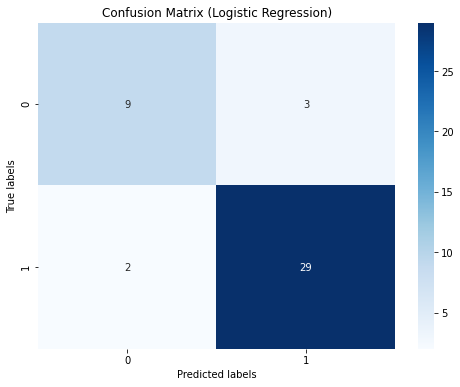

In [16]:
cm = confusion_matrix(y_test, y_pred_label)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

This visualization of a confusion matrix shows the frequency of each type of prediction error and correct classification, which is a clear and intuitive representation of the performance of our logistic regression model.

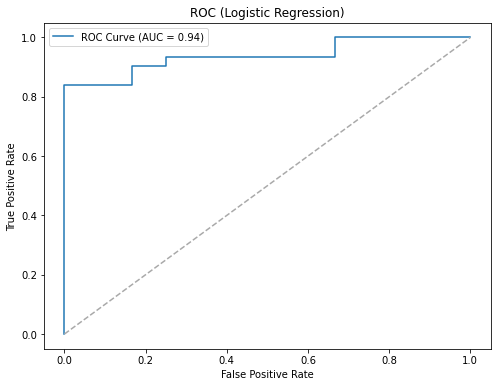

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Logistic Regression)')
plt.legend()
plt.show()

A ROC AUC of 0.94 means a 94% chance that the logistic model will correctly distinguish between the positive and negative classes. Therefore, our model has a robust discriminatory power to separate two groups.

### 2.2 Random Forest Classifier

Then, we will use a random forest classifier to redo the same process above.

In [18]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)


RandomForestClassifier()

In [19]:
y_pred = rfc.predict(X_test)
y_pred_label = [1 if p > 0.5 else 0.0 for p in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred_label))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_label))
print("Classification Report:\n", classification_report(y_test, y_pred_label))

Accuracy: 0.813953488372093
Confusion Matrix:
 [[ 5  7]
 [ 1 30]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.42      0.56        12
         1.0       0.81      0.97      0.88        31

    accuracy                           0.81        43
   macro avg       0.82      0.69      0.72        43
weighted avg       0.82      0.81      0.79        43



The random forest model output the accuracy of 79.07% approximately, which is slightly weaker than the logistic model.

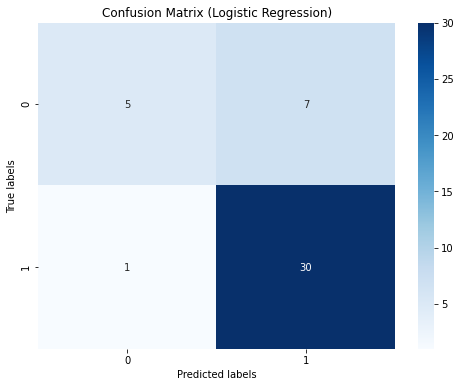

In [20]:
cm = confusion_matrix(y_test, y_pred_label)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

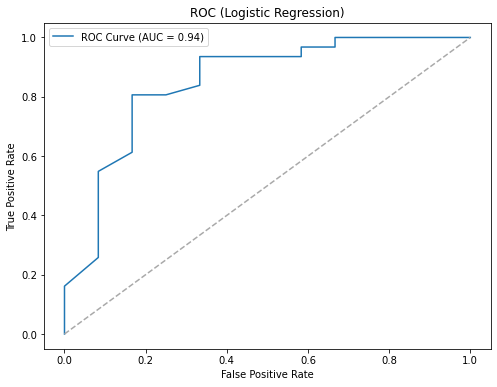

In [21]:
y_pred_prob = rfc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Logistic Regression)')
plt.legend()
plt.show()

There is a 94% chance that the random forest classifier model will correctly distinguish between the positive class and the negative class, which is exactly the same as our logistic model.

In [22]:
feature_importances = rfc.feature_importances_
feature_names = X.columns
importances = zip(feature_names, feature_importances)
importances_sorted = sorted(importances, key=lambda x: x[1], reverse=True)

importances_sorted

[('Secondary Education percentage', 0.278095475308722),
 ('Degree Percentage', 0.2259878919898614),
 ('Higher Secondary Education percentage', 0.19483410126674133),
 ('MBA percentage', 0.10897549874726972),
 ('Employability Test percentage', 0.07257547082841027),
 ('Work Experience', 0.03315841838294821),
 ('MBA Specialization_Mkt&HR', 0.03037838006938189),
 ('Gender', 0.016278677183557546),
 ('Specialization in Higher Secondary Education_Science',
  0.012432969337587379),
 ('Specialization in Higher Secondary Education_Commerce',
  0.010504678873549868),
 ('Degree Type_Sci&Tech', 0.008600932956760307),
 ('Degree Type_Others', 0.008177505055210123),
 ('const', 0.0)]

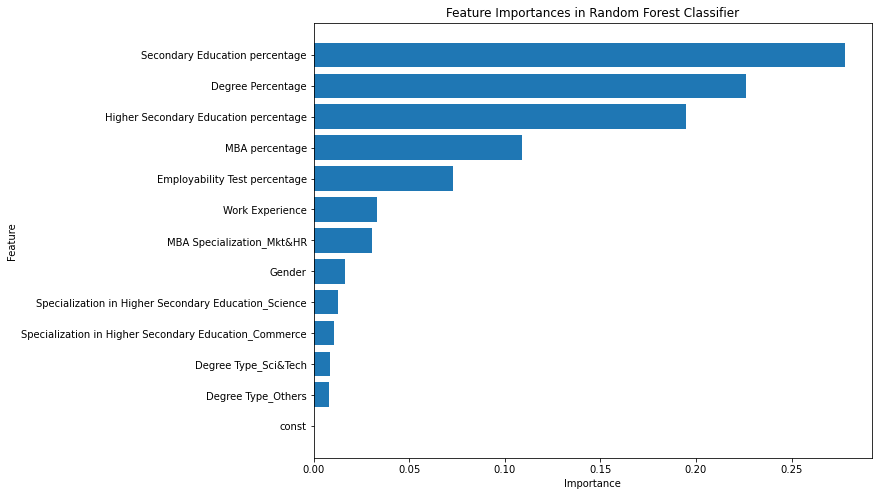

In [23]:
df_importances = pd.DataFrame(importances_sorted, columns=['Feature', 'Importance'])

plt.figure(figsize=(10, 8))
plt.barh(df_importances['Feature'], df_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

The feature importance values do not suggest causal effects but indicate how vital an x variable is relative to the y variable (recruitment decision).

Given that the two models have almost identical predictive accuracy. Even though we found that "Gender" and "Work Experience" have statistically significant impacts on campus recruitment from the logistic model, the random forest classifier model, on the other hand, suggests that "Gender" and "Work Experience" are not the major contributors in making recruitment predictions, having their corresponding feature importance values approximately equal to 0.03540 and 0.0184.

In summary, we cannot justify whether gender or work experience is the bias in campus recruitment, as the two models show very different results. In the traditional logistic model, the parametric result suggested that gender and work experience could make a difference in recruitment decisions. However, even though the random forest is a non-parametric model, the importance of the feature indicated that gender and work experience are minor contributors to the predictions of a recruitment decision.

### Part 3: Is there any bias in salary?

In [24]:
df2 = df[df['Status of Placement'] == 1]
df2

,Gender,Secondary Education percentage,Higher Secondary Education percentage,Specialization in Higher Secondary Education,Degree Percentage,Degree Type,Work Experience,Employability Test percentage,MBA Specialization,MBA percentage,Status of Placement,Salary
0,1.0,67.00,91.00,Commerce,58.00,Sci&Tech,0.0,55.0,Mkt&HR,58.80,1.0,270000.0
1,1.0,79.33,78.33,Science,77.48,Sci&Tech,1.0,86.5,Mkt&Fin,66.28,1.0,200000.0
2,1.0,65.00,68.00,Arts,64.00,Comm&Mgmt,0.0,75.0,Mkt&Fin,57.80,1.0,250000.0
4,1.0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0.0,96.8,Mkt&Fin,55.50,1.0,425000.0
7,1.0,82.00,64.00,Science,66.00,Sci&Tech,1.0,67.0,Mkt&Fin,62.14,1.0,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.0,62.00,72.00,Commerce,65.00,Comm&Mgmt,0.0,67.0,Mkt&Fin,56.49,1.0,216000.0
210,1.0,80.60,82.00,Commerce,77.60,Comm&Mgmt,0.0,91.0,Mkt&Fin,74.49,1.0,400000.0
211,1.0,58.00,60.00,Science,72.00,Sci&Tech,0.0,74.0,Mkt&Fin,53.62,1.0,275000.0
212,1.0,67.00,67.00,Commerce,73.00,Comm&Mgmt,1.0,59.0,Mkt&Fin,69.72,1.0,295000.0



The table df2 gives us a detailed look at the data for students who got placed. It helps us understand things like their scores, backgrounds, and other vital details about this group of students. This way, we can zoom in on what is common among the students who landed jobs and analyze that specific set of data.

We look at how these factors affect salary, conditional on recruited individuals.

In [25]:
df2.isna().sum()

Gender                                          0
Secondary Education percentage                  0
Higher Secondary Education percentage           0
Specialization in Higher Secondary Education    0
Degree Percentage                               0
Degree Type                                     0
Work Experience                                 0
Employability Test percentage                   0
MBA Specialization                              0
MBA percentage                                  0
Status of Placement                             0
Salary                                          0
dtype: int64

In [26]:
(df2['Salary'] ==0).sum()

0

Check if there are any missing values in df2.

In [3]:
df2 = pd.get_dummies(df2, columns=['Specialization in Higher Secondary Education',
                                       'Degree Type',
                                       'MBA Specialization'], drop_first=True)
df2

NameError: name 'pd' is not defined

In [28]:
y = df2['Salary']
x = df2.drop(['Status of Placement', 'Salary'], axis=1)

### 3.1 Linear Regression

We will use Ordinary Least Squares (OLS) regression model to predicts Salary based on various factors.

In [29]:
X = sm.add_constant(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

linear_reg = sm.OLS(y_train, X_train).fit()
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1.742
Date:                Sat, 16 Dec 2023   Prob (F-statistic):             0.0680
Time:                        04:33:22   Log-Likelihood:                -1507.1
No. Observations:                 118   AIC:                             3040.
Df Residuals:                     105   BIC:                             3076.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

The R-squared = 0.166 suggests that only a fraction variation in y (salary) can be explained by x variables. Even though the coefficient of each variable is very different from 0, only the "MBA Percentage" is statistically significant at 5%. The low R-squared and high p-value could be due to the relatively small sample, with only 118 observations in the training data.

In summary, the model shows that the 'MBA percentage' has a noticeable impact on salary. Even it does not explain a large portion of the salary variations, we can conclude a higher MBA score lead to  higher salary.

In [30]:
pvalues = linear_reg.pvalues
pvalues_columns = pvalues[pvalues < 0.05].index
pvalues_columns

Index(['MBA percentage'], dtype='object')

In [31]:
y_pred = linear_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  94946.6376510287


We want to measure RMSE because RMSE has the same unit as the y variable (salary). The RMSE = 94946.64 means this linear model's rooted mean square error is $94946.64, which is relatively high.

### 3.2 Random Forest Regression

Finally, we will redo the same process using Random Forest Regression.

In [32]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 101737.446825968


The Random Forest regression model has similar accuracy as the linear regression, measured by RMSE.

In [34]:
feature_importances = rfr.feature_importances_
feature_names = X.columns
importances = zip(feature_names, feature_importances)

sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)

sorted_importances

[('Higher Secondary Education percentage', 0.21455110428664306),
 ('Secondary Education percentage', 0.20210949948723744),
 ('MBA percentage', 0.1981311831658711),
 ('Degree Percentage', 0.13698553260659949),
 ('Employability Test percentage', 0.12022569586887895),
 ('Degree Type_Sci&Tech', 0.044979859875085716),
 ('Work Experience', 0.021752963409414284),
 ('Gender', 0.018723060698806148),
 ('Specialization in Higher Secondary Education_Commerce',
  0.01571359448138644),
 ('Specialization in Higher Secondary Education_Science', 0.01352616260143538),
 ('MBA Specialization_Mkt&HR', 0.010973201362205682),
 ('Degree Type_Others', 0.002328142156436378),
 ('const', 0.0)]

The list ranks the factors influencing the model's predictions from most to least important, demonstrating the varying levels of importance of different educational qualifications, experience, and other factors. Education-related variables, particularly the percentages in Higher Secondary and Secondary Education and the MBA percentage, are the most influential factors in our model.

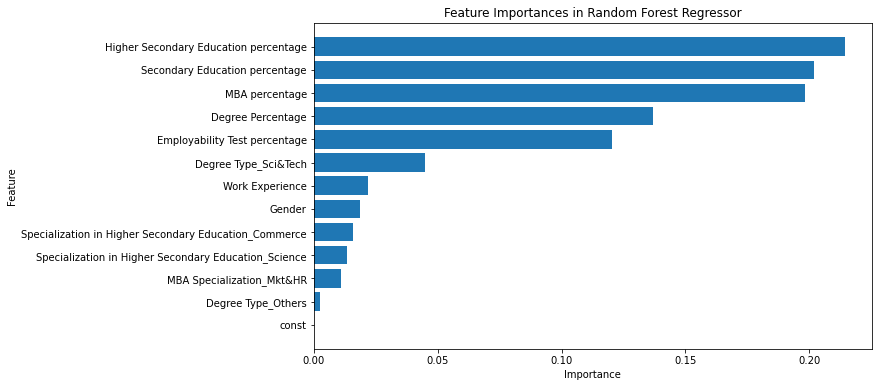

In [35]:
df_importances = pd.DataFrame(sorted_importances, columns=['Feature', 'Importance'])

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(df_importances['Feature'], df_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()


The feature importance values of the variables we care about, "Gender" and "Work Experience," are relatively small. This result indicates that gender and work experience are not the key factors that affect salary the most. Moreover, this model shows another exciting result: a higher GPA would result in a higher salary.

Even though there are positive correlations shown between x variables "Gender" and "Work Experience" and y variables "Salary," their p-values tell us the coefficients are not statistically significant, plus the poor R-squared. Additionally, the random forest regression model suggested that "Gender" and "Work Experience" are the minor contributors in predicting "salary." In conclusion, there is insufficient evidence from this dataset to convince us of any bias in campus recruitment.

### Conclusion

Our study revealed potential biases in campus recruitment decisions, but contrasting results from two different models prevent us from making definitive conclusions. In the classification model, GPA emerged as the most influential factor in recruitment decision-making. This model assigns substantial importance to "Secondary Education Percentage" (0.28), "Higher Secondary Education Percentage" (0.195), and "Degree Percentage" (0.22). Conversely, in the regression model, "Gender" and "Work Experience" surfaced as the most influential variables, indicating the possibility of bias in recruitment.

Similar patterns were observed in our salary investigation. The regression model suggested potential biases related to "Gender" and "Work Experience." In contrast, the classification model identified "GPA" as the most influential factor in determining salaries, indicating that a higher GPA is associated with higher earnings. This discrepancy between the models highlights the complexity of identifying biases in employment processes and the need for careful interpretation of data from different analytical approaches.

These findings collectively suggest that while academic performance is a key consideration in both recruitment and salary decisions, other factors like gender, work experience, and possibly inherent biases, also significantly influence these outcomes. This complexity underscores the need for educational institutions to critically evaluate their recruitment and compensation policies to ensure fairness and equity. Future research should aim to delve deeper into these factors, possibly using a more integrated model approach, to better understand and address the underlying causes of these disparities.

### Limitations:

While this research provides essential insights into the factors influencing hiring decisions, there are some limitations which further underscore the complexities of recruitment biases.

1. Potential omitted variable bias

Our research primarily focused on the impact of gender, academic degree, and Grade Point Average (GPA) on recruitment outcomes. However, it's important to consider additional influential factors that could affect these main variables. These include work experience, extracurricular activities, and personal networks. Neglecting these variables might result in an incomplete understanding of the recruitment process. Notably, 'Secondary Education percentage' and 'Higher Secondary Education percentage' (GPA) significantly influence the classifier's predictions regarding placement and salary. To accurately assess the impact of GPA on placement and salary, it's crucial to account for potential confounders like individual ability, as they can introduce bias into the results.

2. Data scope

Our research's other limitation is its narrow data scope, which is restricted to only one university within a specific region. This could lead to our findings lack of universality and may not entirely represent the various recruitment biases that exist globally.

### References:

Chen, Claire, "A Review Examining Biases in Workplace Hiring and Promotion Processes" (2023). CMC Senior Theses. 3221. https://scholarship.claremont.edu/cmc_theses/3221